# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
#libraries to be used
import pandas as pd
import requests 
import os
import numpy as np
import tweepy
from tweepy import OAuthHandler
import json
import re
import warnings
from timeit import default_timer as timer
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

In [2]:
#opening of the csv file 
twitter_archive_enhanced = pd.read_csv('twitter_archive_enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#Download the image predictions tsv file using the request library  
folder = 'weRateDog'
if not os.path.exists(folder):
    os.makedirs(folder)
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(folder,url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)
    
image_predictions= pd.read_csv('weRateDog/image-predictions.tsv', sep= '\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = twitter_archive_enhanced.tweet_id.values
len(tweet_ids)

count = 0
fails_dict = {}
start = timer()
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [4]:
twitter_list =[]

#read .txt file line by line into a list of dictionaries
for line in open ('tweet_json.txt', 'r'):
    twitter_data =json.loads(line)
    twitter_list.append({'tweet_id': twitter_data['id_str'],
                        'retweet_count': twitter_data['retweet_count'],
                        'favorite_count': twitter_data['favorite_count']})
    
    twitter_data = pd.DataFrame(twitter_list, columns =['tweet_id', 'retweet_count', 'favorite_count'])

## Assessing Data

In [5]:
twitter_archive_enhanced.head(6)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None


In [6]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [7]:
twitter_archive_enhanced[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [8]:
twitter_archive_enhanced.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [9]:
twitter_archive_enhanced.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [10]:
twitter_archive_enhanced.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [11]:
twitter_archive_enhanced.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Tucker        10
Lola          10
Penny         10
Bo             9
Winston        9
the            8
Sadie          8
an             7
Buddy          7
Bailey         7
Daisy          7
Toby           7
Oscar          6
Rusty          6
Bella          6
Koda           6
Leo            6
Milo           6
Jax            6
Scout          6
Dave           6
Stanley        6
Jack           6
Bentley        5
            ... 
Sully          1
Ron            1
Patch          1
Mike           1
Skye           1
Enchilada      1
Griswold       1
Gustaf         1
Howie          1
Willy          1
Hazel          1
Remus          1
Bruno          1
Peanut         1
Dudley         1
Tayzie         1
O              1
Sprout         1
Pubert         1
Blipson        1
Dobby          1
Tuco           1
Karl           1
Sandra         1
Ambrose        1
Mairi          1
Chesney        1
Pepper        

In [12]:
image_predictions.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [13]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
image_predictions.duplicated().sum()

0

In [15]:
twitter_data.head(10)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [16]:
twitter_data.describe()

,retweet_count,favorite_count
count,2354.000000,2354.000000
mean,3164.797366,8080.968564
std,5284.770364,11814.771334
min,0.000000,0.000000
25%,624.500000,1415.000000
50%,1473.500000,3603.500000
75%,3652.000000,10122.250000
max,79515.000000,132810.000000


In [17]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


### Quality issues
1.Some dog names are incorrect and should be dropped

2.Some dogs have 2 dog stages.

3.Erroneous datatypes need to be fixed (Timestamp column is not of the correct datatype, Tweet_id column should be an object not integer, convert source to datatype categoty.)

4.Source column is in HTML-formatted string, not a normal string

5.Columns not used should be dropped

6.Some images are not pictures of dogs

7.The dog rates should be standardized

8.Keep original ratings that have images

### Tidiness issues
1.The three pieces of data are merged to foem one dataset 

2.Create one column for the various dog types: doggo, floofer, pupper, puppo.


## Cleaning Data

In [18]:
# Make copies of original pieces of data
twitter_archive_enhanced_cleaned = twitter_archive_enhanced.copy()
twitter_data_cleaned = twitter_data.copy()
image_predictions_cleaned = image_predictions.copy()

### Issue #1:


#### Define
Some dog names are incorrect and should be dropped

In [19]:
twitter_archive_enhanced_cleaned.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

#### Code 

In [20]:
#dropping names 
twitter_archive_enhanced_cleaned['name'][twitter_archive_enhanced_cleaned['name'].str.match('[a-z]+')] = 'None'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [21]:
twitter_archive_enhanced_cleaned.name.value_counts()

None         854
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Tucker        10
Lola          10
Penny         10
Bo             9
Winston        9
Sadie          8
Buddy          7
Bailey         7
Toby           7
Daisy          7
Dave           6
Rusty          6
Bella          6
Oscar          6
Jax            6
Leo            6
Koda           6
Milo           6
Scout          6
Stanley        6
Jack           6
Alfie          5
Larry          5
Finn           5
Bentley        5
            ... 
Patch          1
Mike           1
Skye           1
Spencer        1
Dutch          1
Beebop         1
Holly          1
Sundance       1
Mollie         1
Josep          1
Dudley         1
Tayzie         1
O              1
Sprout         1
Howie          1
Pubert         1
Dobby          1
Tuco           1
Karl           1
Sandra         1
Ambrose        1
Mairi          1
Pepper         1
Heinrich       1
Kara           1
Blipson        1
Griswold       1
Shooter       

#### Test

In [22]:
twitter_archive_enhanced_cleaned.name.value_counts()

None         854
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Tucker        10
Lola          10
Penny         10
Bo             9
Winston        9
Sadie          8
Buddy          7
Bailey         7
Toby           7
Daisy          7
Dave           6
Rusty          6
Bella          6
Oscar          6
Jax            6
Leo            6
Koda           6
Milo           6
Scout          6
Stanley        6
Jack           6
Alfie          5
Larry          5
Finn           5
Bentley        5
            ... 
Patch          1
Mike           1
Skye           1
Spencer        1
Dutch          1
Beebop         1
Holly          1
Sundance       1
Mollie         1
Josep          1
Dudley         1
Tayzie         1
O              1
Sprout         1
Howie          1
Pubert         1
Dobby          1
Tuco           1
Karl           1
Sandra         1
Ambrose        1
Mairi          1
Pepper         1
Heinrich       1
Kara           1
Blipson        1
Griswold       1
Shooter       

### Issue #2:

#### Define
Some dogs have 2 dog stages instead of one 

#### Code

In [23]:
twitter_archive_enhanced_cleaned['add_all'] = twitter_archive_enhanced_cleaned.doggo + twitter_archive_enhanced_cleaned.floofer + twitter_archive_enhanced_cleaned.pupper + twitter_archive_enhanced_cleaned.puppo 

In [24]:
twitter_archive_enhanced_cleaned.add_all.value_counts() 

NoneNoneNoneNone        1976
NoneNonepupperNone       245
doggoNoneNoneNone         83
NoneNoneNonepuppo         29
doggoNonepupperNone       12
NoneflooferNoneNone        9
doggoflooferNoneNone       1
doggoNoneNonepuppo         1
Name: add_all, dtype: int64

In [25]:
# create function to check dog stages
def check_stages(archive):
    if archive['add_all'].count('None') == 2:
        return 'Multiple' #this means it has more than one dog stage
    else:
        if archive['add_all'].count('doggo') == 1:
            return 'Doggo'
        elif archive['add_all'].count('floofer') == 1:
            return 'Floofer'
        elif archive['add_all'].count('pupper') == 1:
            return 'Pupper'
        elif archive['add_all'].count('puppo') == 1:
            return 'Puppo'
        else:
            return 'None'

twitter_archive_enhanced_cleaned['dog_stage'] = twitter_archive_enhanced_cleaned.apply(check_stages, axis=1)

### Test

In [26]:
twitter_archive_enhanced_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
add_all                       23

## Issue #3:

#### Define
 Erroneous data

#### Code 

In [27]:
# Removing the timezone from the "timestamp" column
twitter_archive_enhanced_cleaned.timestamp = pd.to_datetime(twitter_archive_enhanced_cleaned.timestamp)

# Converting tweet_id to str twitter_archive_enhanced_cleaned, image_predictions_cleaned and twitter_data_cleaned tables. 
twitter_archive_enhanced_cleaned.tweet_id = twitter_archive_enhanced_cleaned.tweet_id.astype(str)
image_predictions_cleaned.tweet_id = image_predictions_cleaned.tweet_id.astype(str)
twitter_data_cleaned.tweet_id = twitter_data_cleaned.tweet_id.astype(str)

# convert source to category datatype
twitter_archive_enhanced_cleaned.source = twitter_archive_enhanced_cleaned.source.astype("category")

#### Test

In [28]:
twitter_archive_enhanced_cleaned.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,add_all,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,NoneNoneNoneNone,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,NoneNoneNoneNone,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,NoneNoneNoneNone,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,NoneNoneNoneNone,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,NoneNoneNoneNone,None


In [29]:
twitter_archive_enhanced_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null category
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
add_all              

In [30]:
image_predictions_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [31]:
twitter_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


## Issue #4:

#### Define
Source column is in HTML-formatted string, not a normal string

#### Code 

In [32]:
twitter_archive_enhanced_cleaned.source = twitter_archive_enhanced_cleaned.source.str.extract('>([\w\W\s]*)<', expand=True)

#### Test

In [33]:
twitter_archive_enhanced_cleaned.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

In [34]:
twitter_archive_enhanced_cleaned.head(30)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,add_all,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,NoneNoneNoneNone,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,NoneNoneNoneNone,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,NoneNoneNoneNone,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,NoneNoneNoneNone,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,NoneNoneNoneNone,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None,NoneNoneNoneNone,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,NoneNoneNoneNone,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None,NoneNoneNoneNone,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None,NoneNoneNoneNone,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,doggoNoneNoneNone,Doggo


## Issue #5:

#### Define
Columns not used should be dropped

#### Code 

In [35]:
twitter_archive_enhanced_cleaned = twitter_archive_enhanced_cleaned[twitter_archive_enhanced_cleaned.retweeted_status_id.isnull()]
twitter_archive_enhanced_cleaned = twitter_archive_enhanced_cleaned[twitter_archive_enhanced_cleaned.retweeted_status_user_id.isnull()]
twitter_archive_enhanced_cleaned = twitter_archive_enhanced_cleaned[twitter_archive_enhanced_cleaned.retweeted_status_timestamp.isnull()]

In [36]:
twitter_archive_enhanced_cleaned = twitter_archive_enhanced_cleaned.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                                            'retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls'], 1)

#### Test

In [37]:
#confirm changes
twitter_archive_enhanced_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
add_all               2175 non-null object
dog_stage             2175 non-null object
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 237.9+ KB


In [38]:
twitter_archive_enhanced_cleaned.dog_stage.value_counts()

None        1831
Pupper       224
Doggo         75
Puppo         24
Multiple      12
Floofer        9
Name: dog_stage, dtype: int64

## Issue #6:

#### Define
Some images are not pictures of dogs

#### Code 

In [39]:
false_dog_images = image_predictions_cleaned.query('p1_dog==False and p2_dog==False and p3_dog==False').index

In [40]:
image_predictions_cleaned.drop(false_dog_images, inplace=True)

#### Test

In [41]:
len(image_predictions_cleaned.query('p1_dog==False and p2_dog==False and p3_dog==False'))

0

## Issue #7:

### Define
The dog rates should be standardized

### Code

In [42]:
twitter_archive_enhanced_cleaned['rating_numerator'] = twitter_archive_enhanced_cleaned['rating_numerator'].astype(float)

In [43]:
twitter_archive_enhanced_cleaned['rating_denominator'] = twitter_archive_enhanced_cleaned['rating_denominator'].astype(float)

In [44]:
twitter_archive_enhanced_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
add_all               2175 non-null object
dog_stage             2175 non-null object
dtypes: datetime64[ns](1), float64(2), object(10)
memory usage: 237.9+ KB


In [45]:
# For loop to gather all text, indices, and ratings for tweets that contain a decimal in the numerator of the rating
ratings_decimals_text = []
ratings_decimals_index = []
ratings_decimals = []

for i, text in twitter_archive_enhanced_cleaned['text'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', text)):
        ratings_decimals_text.append(text)
        ratings_decimals_index.append(i)
        ratings_decimals.append(re.search('\d+\.\d+', text).group())

# Print ratings with decimals        
ratings_decimals_text

['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
 "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
 "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
 "I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace",
 'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD']

In [46]:
# Print the indices of the ratings above (have decimal)
ratings_decimals_index

[45, 695, 763, 1689, 1712]

In [47]:
#Correctly converting the above decimal ratings to float
twitter_archive_enhanced_cleaned.loc[ratings_decimals_index[0],'rating_numerator'] = float(ratings_decimals[0])
twitter_archive_enhanced_cleaned.loc[ratings_decimals_index[1],'rating_numerator'] = float(ratings_decimals[1])
twitter_archive_enhanced_cleaned.loc[ratings_decimals_index[2],'rating_numerator'] = float(ratings_decimals[2])
twitter_archive_enhanced_cleaned.loc[ratings_decimals_index[3],'rating_numerator'] = float(ratings_decimals[3])

In [48]:
twitter_archive_enhanced_cleaned.loc[40]

tweet_id                                             884562892145688576
timestamp                                           2017-07-11 00:00:02
source                                               Twitter for iPhone
text                  This is Kevin. He's just so happy. 13/10 what ...
rating_numerator                                                     13
rating_denominator                                                   10
name                                                              Kevin
doggo                                                              None
floofer                                                            None
pupper                                                             None
puppo                                                              None
add_all                                                NoneNoneNoneNone
dog_stage                                                          None
Name: 40, dtype: object

In [49]:
# Create a new column called rating, and calulate the value with new, standardized ratings
twitter_archive_enhanced_cleaned['rating'] = twitter_archive_enhanced_cleaned['rating_numerator'] / twitter_archive_enhanced_cleaned['rating_denominator']

### Test

In [50]:
twitter_archive_enhanced_cleaned.sample(10)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,add_all,dog_stage,rating
846,766313316352462849,2016-08-18 16:38:26,Twitter for iPhone,This is Oscar. He has legendary eyebrows and h...,12.0,10.0,Oscar,None,None,None,None,NoneNoneNoneNone,None,1.2
2000,672488522314567680,2015-12-03 18:52:12,Twitter for iPhone,"This is Jackie. She was all ready to go out, b...",10.0,10.0,Jackie,None,None,None,None,NoneNoneNoneNone,None,1.0
2020,672095186491711488,2015-12-02 16:49:14,Twitter for iPhone,This is Tuco. That's the toast that killed his...,9.0,10.0,Tuco,None,None,None,None,NoneNoneNoneNone,None,0.9
2334,666293911632134144,2015-11-16 16:37:02,Twitter for iPhone,This is a funny dog. Weird toes. Won't come do...,3.0,10.0,None,None,None,None,None,NoneNoneNoneNone,None,0.3
191,855851453814013952,2017-04-22 18:31:02,Twitter for iPhone,Here's a puppo participating in the #ScienceMa...,13.0,10.0,None,doggo,None,None,puppo,doggoNoneNonepuppo,Multiple,1.3
23,887473957103951883,2017-07-19 00:47:34,Twitter for iPhone,This is Canela. She attempted some fancy porch...,13.0,10.0,Canela,None,None,None,None,NoneNoneNoneNone,None,1.3
2056,671357843010908160,2015-11-30 15:59:17,Twitter for iPhone,Tfw she says hello from the other side. 9/10 h...,9.0,10.0,None,None,None,None,None,NoneNoneNoneNone,None,0.9
1256,710588934686908417,2016-03-17 22:09:38,Twitter for iPhone,This is Beemo. He's a Chubberflop mix. 12/10 w...,12.0,10.0,Beemo,None,None,None,None,NoneNoneNoneNone,None,1.2
1449,696100768806522880,2016-02-06 22:38:50,Vine - Make a Scene,This poor pupper has been stuck in a vortex si...,10.0,10.0,None,None,None,pupper,None,NoneNonepupperNone,Pupper,1.0
206,852672615818899456,2017-04-13 23:59:28,Twitter for iPhone,This is Aspen. She's never tasted a stick so s...,12.0,10.0,Aspen,None,None,None,None,NoneNoneNoneNone,None,1.2



## Issue #8

#### Define
Removing of hyperlinks in tweets


#### Code 

In [51]:
def htmlink(x):
        http_pos = x.find("http")
        # If no link, retain row
        if http_pos == -1:
            x = x
        else:
            # Remove space before link to end
            x = x[:http_pos - 1]
        return x
    
twitter_archive_enhanced_cleaned.text = twitter_archive_enhanced_cleaned.text.apply(htmlink)

#### Test

In [52]:
# comfirming changes made 
for row in twitter_archive_enhanced_cleaned.text[:10]:
     print(row)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10
This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us
This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek
Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek
Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below

When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10
This is Zoey. She doesn't want to be one of the scary shark

# Tidiness

#### Define
The twitter api table and image prediction table should be merged to twitter archive table.

#### Code 

In [53]:
# Merging of the three tables
twitter_df =  pd.merge(left=twitter_archive_enhanced_cleaned, right=twitter_data_cleaned, how='left', on='tweet_id')
twitter_df  = pd.merge(left= twitter_archive_enhanced_cleaned, right=image_predictions_cleaned, how='left', on='tweet_id')

#### Test

In [54]:
twitter_df.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,None,None,None,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None,None,None,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,None,None,None,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,None,None,None,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


#### Define
Create one column for the various dog types: doggo, floofer, pupper, puppo

#### Code 

In [55]:
# Extract the text from the columns into the new dog_type colunn
twitter_archive_enhanced_cleaned['dog_type'] = twitter_archive_enhanced_cleaned['text'].str.extract('(doggo|floofer|pupper|puppo)')

#### Test

In [56]:
twitter_archive_enhanced_cleaned[['dog_type', 'doggo', 'floofer', 'pupper', 'puppo']].sample(5)

,dog_type,doggo,floofer,pupper,puppo
1451,NaN,None,None,None,None
1631,NaN,None,None,None,None
98,pupper,None,None,pupper,None
393,NaN,None,None,None,None
1763,NaN,None,None,None,None


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [57]:
twitter_archive_enhanced_cleaned.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

In [58]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [59]:
twitter_archive_master.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 15 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
add_all               2175 non-null object
dog_stage             2175 non-null object
rating                2175 non-null float64
dog_type              364 non-null object
dtypes: float64(3), int64(1), object(11)
memory usage: 255.0+ KB


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights

1.Most popular dog names

2.Source with the highest tweets

3.Tweet interactions overtime.


### 1.The most popular dog name

In [60]:
twitter_archive_master.name.value_counts()[1:10]

Lucy       11
Charlie    11
Oliver     10
Cooper     10
Penny       9
Tucker      9
Winston     8
Sadie       8
Lola        8
Name: name, dtype: int64

Text(0,0.5,'Name Of Dogs')

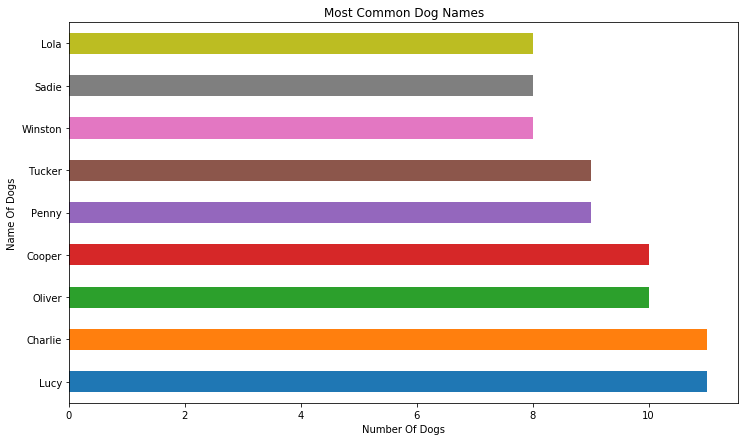

In [61]:
twitter_archive_master.name.value_counts()[1:10].plot(kind = 'barh', figsize=(12,7))
plt.title('Most Common Dog Names')
plt.xlabel('Number Of Dogs')
plt.ylabel('Name Of Dogs')

In [62]:
twitter_archive_master.name.value_counts()

None         784
Lucy          11
Charlie       11
Oliver        10
Cooper        10
Penny          9
Tucker         9
Winston        8
Sadie          8
Lola           8
Toby           7
Daisy          7
Bo             6
Oscar          6
Jax            6
Bella          6
Koda           6
Bailey         6
Stanley        6
Dave           5
Leo            5
Rusty          5
Buddy          5
Bentley        5
Chester        5
Scout          5
Louis          5
Milo           5
Larry          4
Brody          4
            ... 
Severus        1
Finnegus       1
Crawford       1
Brudge         1
Tuco           1
Pubert         1
Mo             1
Howie          1
Eleanor        1
Kona           1
Mookie         1
Bert           1
Mojo           1
Amélie         1
Crimson        1
Nollie         1
Sojourner      1
Lucia          1
Coopson        1
Gustaf         1
Willy          1
Hazel          1
Remus          1
Bruno          1
Peanut         1
Dudley         1
Tayzie         1
O             

Twelve(12) dogs were named as charlie which makes it the most popularly named dog.Lucy, Oliver and Cooper were tied at being the second most popular dogs names with eleven(11) named dogs each. 

### 2.Highest tweet source

In [63]:
source = twitter_archive_enhanced_cleaned.source.value_counts()
source

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

Text(0.5,1,'Percentage Of Source Across Platforms')

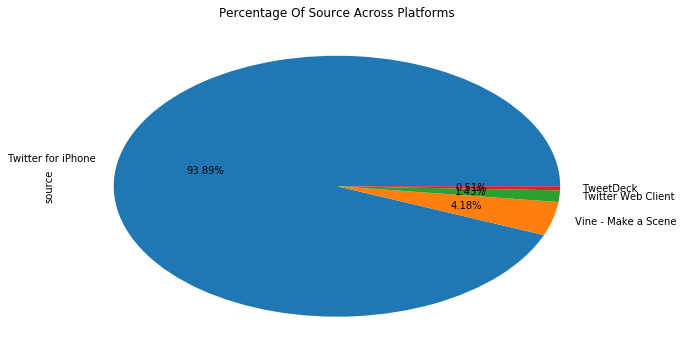

In [64]:
twitter_archive_enhanced_cleaned.source.value_counts().plot(kind = 'pie', autopct='%1.2f%%', figsize = (10, 6))
plt.title('Percentage Of Source Across Platforms')

The above visualisation shows that the highest sources of tweet came from the iphone followed by vine, twitter web client and tweet deck respectively.

###   3.Tweet interactions overtime.

In [65]:
twitter_archive_master.timestamp = pd.to_datetime(twitter_archive_master['timestamp'], format='%Y-%m-%d %H:%M:%S.%f')

monthly_tweets = twitter_archive_master.groupby(pd.Grouper(key = 'timestamp', freq = "M")).count().reset_index()
monthly_tweets = monthly_tweets[['timestamp', 'tweet_id']]
monthly_tweets.head()
monthly_tweets.sum()

tweet_id    2175
dtype: int64

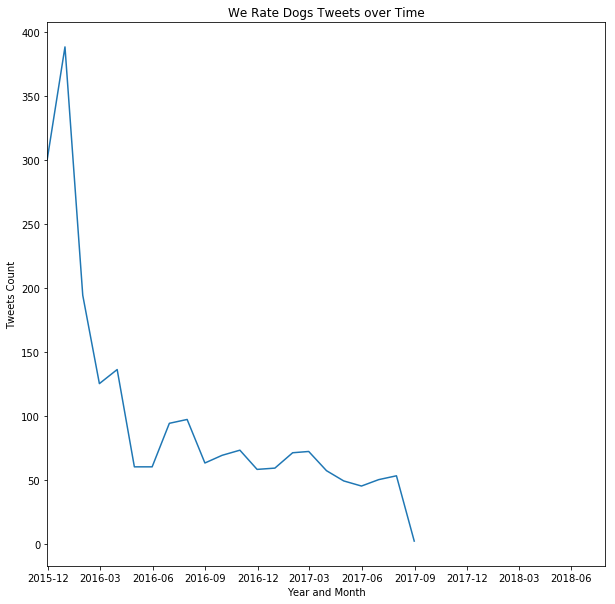

In [66]:
# Plotting time vs. tweets

plt.figure(figsize=(10, 10));
plt.xlim([datetime.date(2015, 11, 30), datetime.date(2018, 7, 30)]);

plt.xlabel('Year and Month')
plt.ylabel('Tweets Count')

plt.plot(monthly_tweets.timestamp, monthly_tweets.tweet_id);
plt.title('We Rate Dogs Tweets over Time');

The graph above interpretes the tweets by the the user and its corresponding interactions over a period of time(2015 – 2018). The tweet interactions saw a rise in numbers in the first quarter of 2016 but seemed to experience a negative regression afterwards until all interactions siezed at the beginning of the quarter of 2017. 